# Introduce the Data

In [2]:
# Import data and take a look
import numpy as np
import pandas as pd

df = pd.read_csv('adult.csv', na_values=['#NAME?'])

In [5]:
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,NaN,0,0,40,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Let's take a look at the outcome variable: 'income'

print(df['income'].value_counts())

<=50K    3779
>50K     1221
Name: income, dtype: int64


In [8]:
# Assign outcome as 0 if income <=50K and as 1 if income >50K

df['income'] = [0 if x == '<=50K' else 1 for x in df['income']]  

# Assign X as a DataFrame of features and y as a Series of the outcome variable

X = df.drop('income', 1) #Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
y = df.income

In [9]:
X.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,NaN,0,0,40,United-States
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [10]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: income, dtype: int64

# Basic data cleaning

In [ ]:
#  Dealing with data types

# There are three main data types:
# Numeric, e.g. income, age
# Categorical, e.g. gender, nationality
# Ordinal, e.g. low/medium/high

# Models can only handle numeric features

# So, we must convert categorical and ordinal features into numeric features
# Create dummy features
# Transform a categorical feature into a set of dummy features, each representing a unique category
# In the set of dummy features, 1 indicates that the observation belongs to that category

In [11]:
# Education is a categorical feature:# Educat 

X['education'].head(5)

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: education, dtype: object

In [12]:
# Use get_dummies in pandas 
# Another option: OneHotEncoder in sci-kit learn

pd.get_dummies(X['education']).head(5)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,?,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [21]:
X["workclass"].value_counts()

Private             3435
Self-emp-not-inc     383
?                    331
Local-gov            329
State-gov            193
Self-emp-inc         182
Federal-gov          146
Without-pay            1
Name: workclass, dtype: int64

In [23]:
X["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [22]:
#To find the # of unique values in a particular column

X["workclass"].value_counts().unique()

array([3435,  383,  331,  329,  193,  182,  146,    1], dtype=int64)

In [13]:
# Decide which categorical variables you want to use in model

for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' has 8 unique categories
Feature 'education' has 17 unique categories
Feature 'marital_status' has 7 unique categories
Feature 'occupation' has 15 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 6 unique categories
Feature 'sex' has 3 unique categories
Feature 'native_country' has 40 unique categories


In [24]:
#Sorting

X['native_country'].value_counts().sort_values(ascending=False).head(10)

United-States    4465
Mexico            104
?                  97
Canada             28
Germany            22
Philippines        22
El-Salvador        16
England            16
Puerto-Rico        16
China              15
Name: native_country, dtype: int64

In [25]:
# In this case, bucket low frequecy categories as "Other"

X['native_country'] = ['United-States ' if x == 'United-States' else 'Other' for x in X['native_country']]

print(X['native_country'].value_counts().sort_values(ascending=False))

United-States     4465
Other              535
Name: native_country, dtype: int64


In [32]:
# Create a list of features to dummy

todummy_list = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

In [33]:
# Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [36]:
X = dummy_df(X, todummy_list)

In [ ]:
#  Handling missing data
    
# Models can not handle missing data

# Simplest solution
# Remove observations/features that have missing data

# But, removing missing data can introduce a lot of issues
# Data is randomly missing: potentially lose a lot of your data
# Data is non-randomly missing: in addition to losing data, you are also introducing potential biases    
# Usually, this is a poor solution

# An alternative solution is to use imputation
# Replace missing value with another value

# Strategies: mean, median, highest frequency value of given feature

In [37]:
# How much of your data is missing?

X.isnull().sum().sort_values(ascending=False).head()

fnlwgt                 107
education_num           57
age                     48
education_Doctorate      0
education_7th-8th        0
dtype: int64

In [38]:
# Impute missing values using Imputer in sklearn.preprocessing

from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X) , columns=X.columns)

In [39]:
# Now check again to see if you still have missing data

X.isnull().sum().sort_values(ascending=False).head()

native_country_United-States     0
education_Bachelors              0
education_5th-6th                0
education_7th-8th                0
education_9th                    0
dtype: int64

# More Data Exploration

## A. Outlier detection

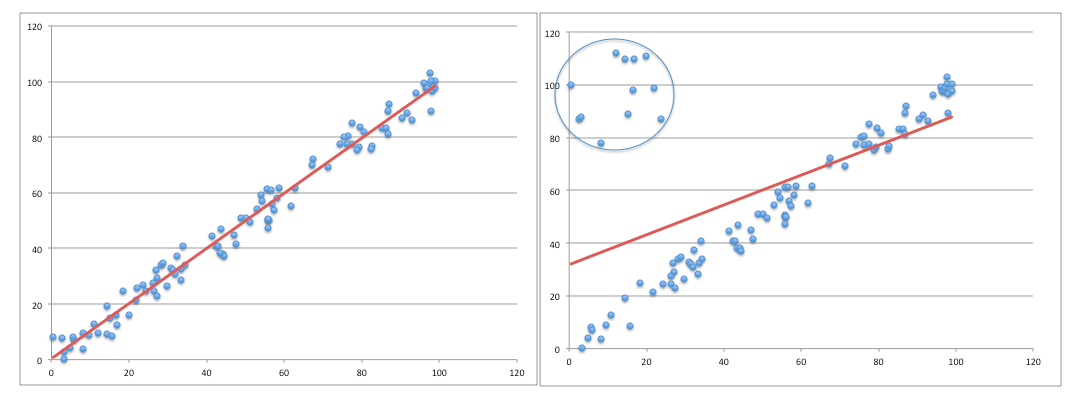

In [41]:
from IPython.display import Image
Image(filename='outliers.jpg')

In [ ]:
# Outlier detection - Tukey IQR

# Identifies extreme values in data

# Outliers are defined as:
# Values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)

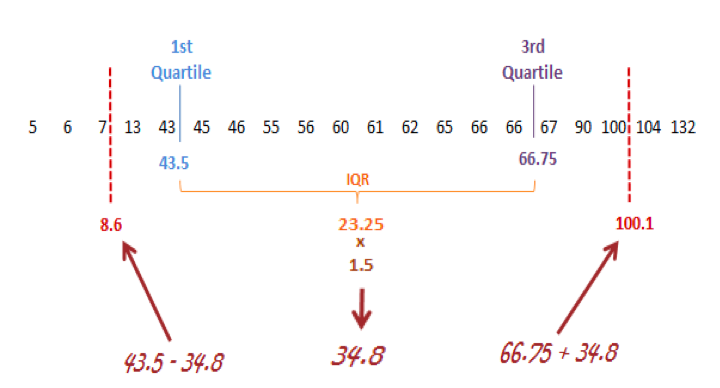

In [42]:
from IPython.display import Image
Image(filename='tukeyiqr.jpg')
# Imagine taken from: 
# http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/

In [43]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [44]:
tukey_indices, tukey_values = find_outliers_tukey(X['age'])
print(np.sort(tukey_values))

[76. 76. 76. 76. 76. 76. 76. 76. 76. 77. 77. 77. 77. 77. 78. 78. 79. 79.
 79. 80. 80. 80. 81. 81. 81. 81. 82. 88. 90. 90. 90. 90. 90. 90. 90.]


## B. Distribution of Features

In [ ]:
# A histogram is a simple representation of the distribution of values for a given feature
# X-axis represents value bins and y-axis represents the frequency of an observation falling into that bin
# It is also interesting to look at distributions broken up by outcome categories

In [45]:
# Use pyplot in matplotlib to plot histograms

%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

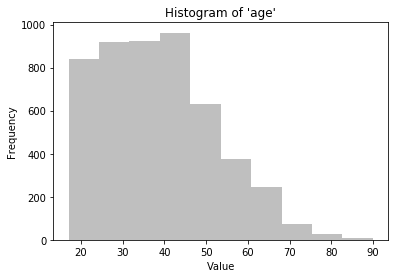

In [46]:
plot_histogram(X['age'])